<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_YB_4%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**미니 프로젝트(1) / 11기 YB 4조 / 김연우 류호현 박유빈 박하민 이선경**



---



# **1. 라이브러리 및 데이터**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies_test.csv to movies_test (3).csv
Saving movies_train.csv to movies_train (3).csv
Saving submission.csv to submission (3).csv


In [ ]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('submission.csv')



---



# **2. 탐색적 자료분석(EDA)**

### (1) 일부 데이터 미리보기

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
test.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
submission.tail()

,title,box_off_num
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0
242,조선안방 스캔들-칠거지악 2,0


### (2) 데이터 요약

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        243 non-null    object
 1   box_off_num  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


| Data | Description | Dtype |
|----------|----------|----------|
| title | 영화의 제목 | object |
| distributor | 배급사 | object |
| genre | 장르 | object |
| release_time | 개봉일 | object |
| time | 상영시간(분) | int64 |
| screaming_rat | 상영등급 | object |
| director | 감독이름 | object |
| dir_prev_bfnum | 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외) | float64 |
| dir_prev_num | 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외) | int64 |
| num_staff | 스텝수 | int64 |
| num_actor | 주연배우수 | int64 |
| box_off_num | 관객수 | int64 |

- release_time 변수는 시간 관련 데이터인데 object로 인식되고 있으므로 추후에 datetime 형으로 변환해야 한다.

### (3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.00,270.00,600.00,600.00,600.00,600.00
mean,100.86,1050442.89,0.88,151.12,3.71,708181.75
std,18.10,1791408.30,1.18,165.65,2.45,1828005.85
min,45.00,1.00,0.00,0.00,0.00,1.00
25%,89.00,20380.00,0.00,17.00,2.00,1297.25
50%,100.00,478423.62,0.00,82.50,3.00,12591.00
75%,114.00,1286568.62,2.00,264.00,4.00,479886.75
max,180.00,17615314.00,5.00,869.00,25.00,14262766.00


In [ ]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.00,107.00,243.00,243.00,243.00
mean,109.80,891669.52,0.85,159.32,3.48
std,124.02,1217341.45,1.20,162.98,2.11
min,40.00,34.00,0.00,0.00,0.00
25%,91.00,62502.00,0.00,18.00,2.00
50%,104.00,493120.00,0.00,105.00,3.00
75%,114.50,1080849.58,1.00,282.00,4.00
max,2015.00,6173099.50,6.00,776.00,16.00


In [ ]:
submission.describe()

,box_off_num
count,243.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.00


### (4) 중복/결측치 확인 및 데이터 전처리

In [ ]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
595,False
596,False
597,False
598,False


In [ ]:
test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
238,False
239,False
240,False
241,False


- train, test 데이터 셋 모두 중복 데이터는 없다

In [ ]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [ ]:
test.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


- train, test 데이터 셋 모두 dir_prev_bfnum 변수에 결측값이 존재한다

In [ ]:
# train set의 결측값 비율
train['dir_prev_bfnum'].isna().mean() * 100

55.00000000000001

In [ ]:
# train set에서 결측값 간의 상관관계 확인 (상관계수 행렬)
train.isna().corr()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screening_rat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dir_prev_bfnum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
dir_prev_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# train set에서 결측값의 특성 확인
train[train['dir_prev_bfnum'].isnull()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [ ]:
# 결측값이 있는 행에서 'dir_prev_num'와의 분포 비교
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].value_counts()

,count
dir_prev_num,
0,330


- train 데이터 셋의 결측값이 있는 행(dir_prev_bfnum)이 다른 열과 어떤 관련이 있는지 확인하였으나 특정 패턴을 갖고 있지 않음을 확인했다.
- 결측값이 있는 행(dir_prev_bfnum)과 특정 조건에서 발생하는 것은 아닌지 조회한 결과, 'dir_prev_bfnum'이 NaN인 경우 'dir_prev_num' 의 값이 0인 것을 확인할 수 있다. 즉 감독의 이전작품이 존재하지 않는다는 것이다.

In [ ]:
# test set의 결측값 비율
test['dir_prev_bfnum'].isna().mean() * 100

55.96707818930041

In [ ]:
# test set에서 결측값 간의 상관관계 확인 (상관계수 행렬)
test.isna().corr()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distributor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screening_rat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dir_prev_bfnum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN
dir_prev_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# test set에서 결측값의 특성 확인
test[test['dir_prev_bfnum'].isnull()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3


In [ ]:
# 결측값이 있는 행에서 'dir_prev_num'와의 분포 비교
test[test['dir_prev_bfnum'].isnull()]['dir_prev_num'].value_counts()

,count
dir_prev_num,
0,136


- test 데이터 셋의 결측값이 있는 행(dir_prev_bfnum)이 다른 열과 어떤 관련이 있는지 확인하였으나 특정 패턴을 갖고 있지 않음을 확인했다.
- 결측값이 있는 행(dir_prev_bfnum)과 특정 조건에서 발생하는 것은 아닌지 조회한 결과, 'dir_prev_bfnum'이 NaN인 경우 'dir_prev_num' 의 값이 0인 것을 확인할 수 있다. 마찬가지로 감독의 이전작품이 존재하지 않는다는 것이다.
- 따라서 train, test 모두 'dir_prev_bfnum'의 결측값을 모두 0으로 채워야 한다.

In [ ]:
# 결측값을 0으로 채우기
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
# 결측값 개수 확인
print(train['dir_prev_bfnum'].isna().sum())
print(test['dir_prev_bfnum'].isna().sum())

0
0


- train, test 모두 결측값이 없어진 것을 확인할 수 있다.

앞서 dtype을 확인하는 단계에서 release_time 변수를 datetime 형으로 변환해야 함을 인식했다.

In [ ]:
# dtype datetime 형으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])
test['release_time'] = pd.to_datetime(test['release_time'])

In [ ]:
# release_time 변수 dtype 확인
print(train['release_time'].dtype)
print(test['release_time'].dtype)

datetime64[ns]
datetime64[ns]


- train, test 모두 release_time의 dtype이 datetime64로 변환된 것을 확인할 수 있다.

### (5) 데이터 시각화 및 분석

**5-1. 상영시간이 가장 긴 영화 장르**

In [ ]:
train[['genre','time']].groupby('genre').mean().sort_values('time')

,time
genre,
애니메이션,82.57
다큐멘터리,88.05
멜로/로맨스,96.64
공포,100.21
SF,101.38
미스터리,102.59
드라마,104.65
코미디,105.26
뮤지컬,107.00


<Axes: xlabel='genre'>

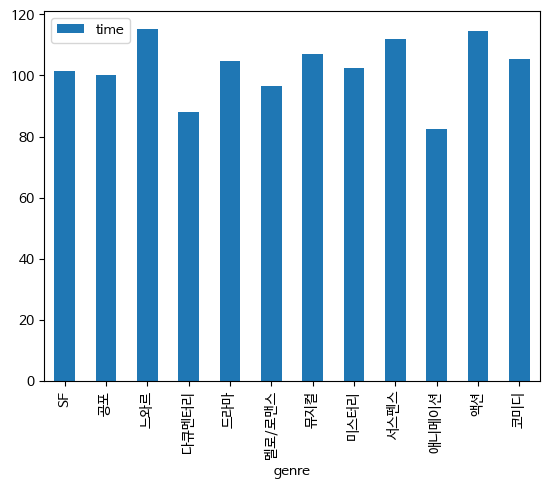

In [ ]:
train[['genre','time']].groupby('genre').mean().plot(kind='bar')

In [ ]:
# train, submission 데이터셋 병합
df = pd.merge(train, submission, on=['title', 'box_off_num'], how='outer')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96.00,청소년 관람불가,조병옥,0.00,0.00,91.00,2.00,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130.00,청소년 관람불가,우민호,1161602.50,2.00,387.00,3.00,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123.00,15세 관람가,장철수,220775.25,4.00,343.00,4.00,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101.00,전체 관람가,구자홍,23894.00,2.00,20.00,6.00,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108.00,15세 관람가,신근호,1.00,1.00,251.00,2.00,483387


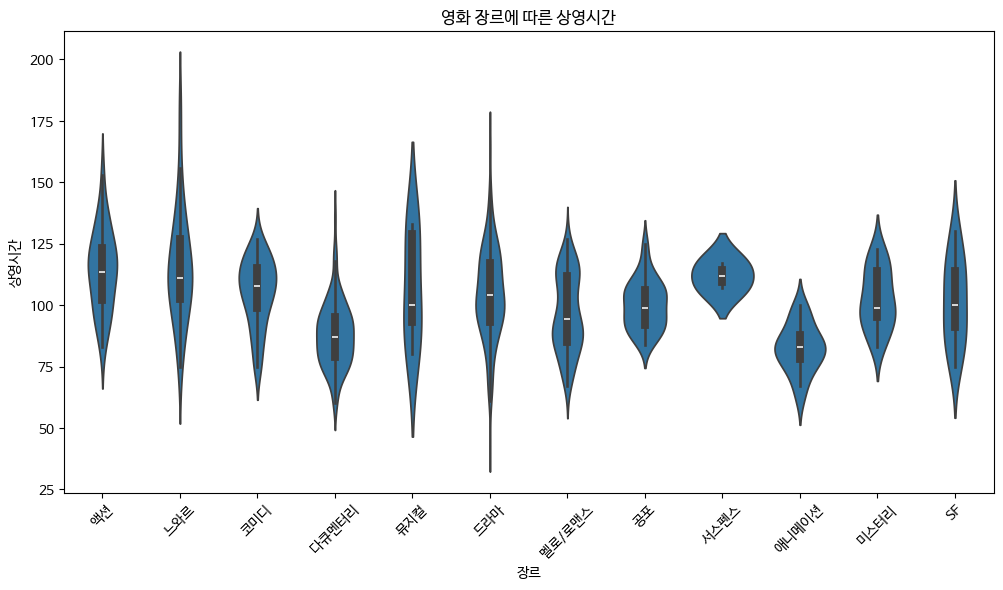

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='time', data=df)
plt.title('영화 장르에 따른 상영시간')
plt.xlabel('장르')
plt.ylabel('상영시간')
plt.xticks(rotation=45) # x축 레이블이 겹치지 않도록 45도 회전시킴
plt.show()

- 느와르, 액션, 서스펜스 순으로 상영시간이 길다.

- 애니메이션 장르의 상영시간이 상대적으로 짧은 것을 확인할 수 있다.

**5-2. 상영시간에 따른 관객 수**

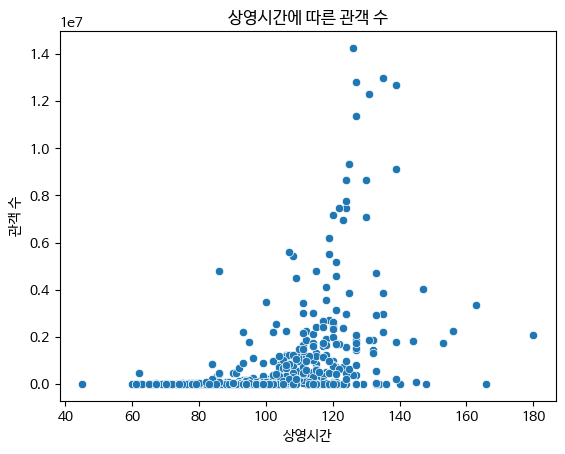

In [ ]:
# 산점도로 표현
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='time', y='box_off_num', data=df)
plt.title('상영시간에 따른 관객 수')
plt.xlabel('상영시간')
plt.ylabel('관객 수')
plt.show()

*  산점도의 분포를 살펴보면, 상영시간이 120에서 140분대의 가장 많은 영화가 분포하고 관객수 또한 가장 많은 것을 확인할 수 있습니다.

In [ ]:
# 상관 계수
corr_value = df['time'].corr(df['box_off_num'])
print(corr_value)

0.44145239154082855


*  양의 상관관게를 보이므로 상영시간이 길어질수록 관객수가 많아짐을 확인할 수 있다. 하지만, 아주 강한 양의 상관관게는 아니므로 상영시간과 관객수 사이에 약한 상관관계가 나타남을 확인할 수 있다.

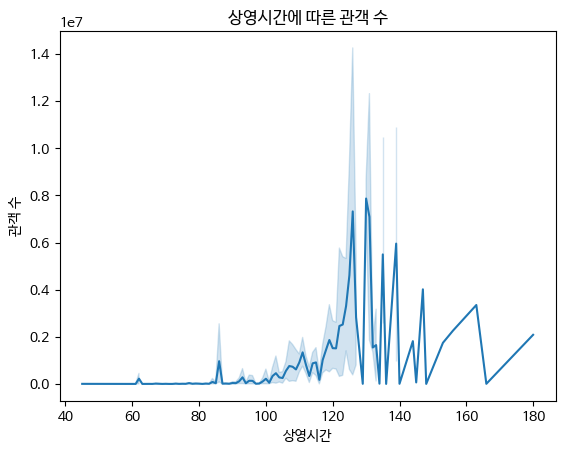

In [ ]:
# lineplot
sns.lineplot(x='time', y='box_off_num', data=df)
plt.title('상영시간에 따른 관객 수')
plt.xlabel('상영시간')
plt.ylabel('관객 수')
plt.show()

*   상영시간이 짧은 시간대 보다 긴 시간대가 관객수가 더 많아지긴 하나 120~140분 대에 관객수가 가장 많은 것을 확인할 수 있다.

*  이러한 결과를 통해서 상영시간이 길어짐에따라 관객수가 많아지긴 하나 120~140분 대의 상영시간일 대의 가장 관객수가 많다는 것을 확인할 수 있다.

**5-3. 스텝수에 따른 관객 수**

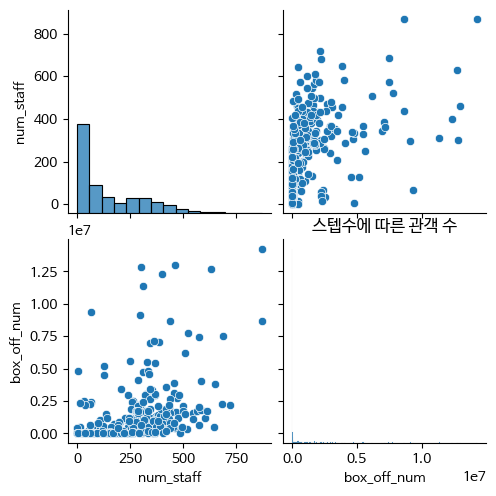

In [ ]:
# 상관계수, 페어플랏으로 표현
selected_columns = df[['num_staff', 'box_off_num']]
selected_columns = pd.DataFrame(selected_columns)

sns.pairplot(selected_columns)
plt.title('스텝수에 따른 관객 수')
plt.xlabel('스텝 수')
plt.ylabel('관객 수')
plt.show()

*  아래 pairplot을 보았을 떄 스텝수가 많아질수록 관객수도 함께 증가하는 모습을 살펴볼 수 있다.

In [ ]:
# 상관계수
x = df['box_off_num'].corr(df['num_staff'])
print(x)

0.5442647163889159


*  스텝수가 많을수록 관객수도 또한 증가한다는 상관관계를 파악할 수 있다.

**5-4. 월별 관객수 변화 추이**

In [ ]:
# release_time에서 월만 추출
month = df['release_time'].dt.month
print(month)

0     11.00
1     11.00
2      6.00
3      7.00
4     11.00
       ... 
838     NaN
839     NaN
840     NaN
841     NaN
842     NaN
Name: release_time, Length: 843, dtype: float64


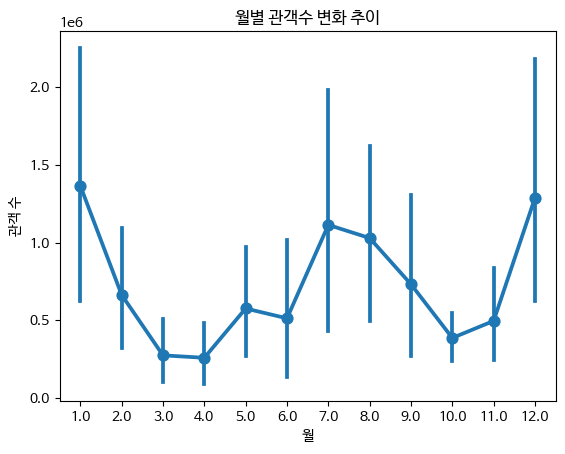

In [ ]:
# pointplot으로 표현
sns.pointplot(x=month, y=df['box_off_num'])
plt.title('월별 관객수 변화 추이')
plt.xlabel('월')
plt.ylabel('관객 수')
plt.show()

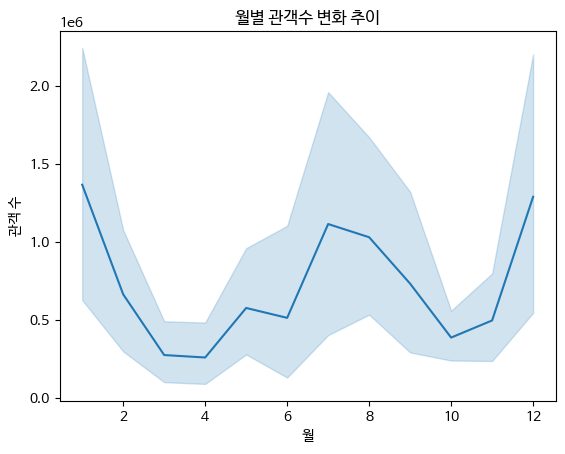

In [ ]:
# lineplot
sns.lineplot(x=month, y=df['box_off_num'])
plt.title('월별 관객수 변화 추이')
plt.xlabel('월')
plt.ylabel('관객 수')
plt.show()

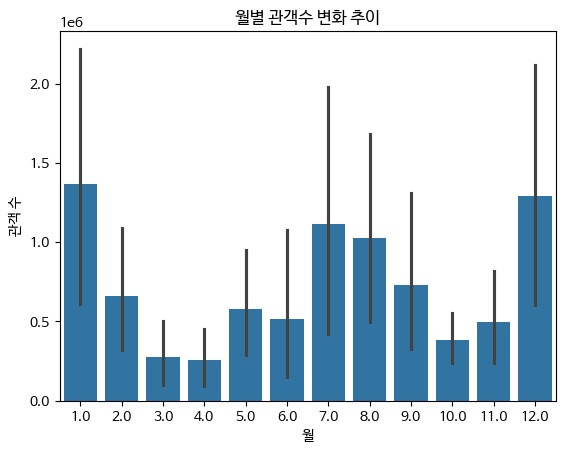

In [ ]:
# barplot
sns.barplot(x=month, y=df['box_off_num'])
plt.title('월별 관객수 변화 추이')
plt.xlabel('월')
plt.ylabel('관객 수')
plt.show()

*  아래 그래프를 살펴보았을 때, 1월에 증가했다가 2월 이후부터 감소하고 6월 이후에 또 증가했다가 8월 이후로 감소하는 것을 확인할 수 있다. 또한, 11월을 기점으로 점점 관객수가 증가해서 12월, 1월이 가장 많은 관객수가 있다는 것을 확인할 수 있다. 이는 방학기간인 12 ~ 2월, 6 ~ 8월 에는 관객수가 증가했다가
개학이후에 다시 감소하는 것을 볼 수 있다. 또한, 여름보다는 겨울에 관객들이 영화관을 더욱더 많이 찾는 것을 확인할 수 있다.

**5-5. 년도 별 관객수 추이**

In [ ]:
# release_time에서 년도만 추출
year = df['release_time'].dt.year
print(year)

0     2012.00
1     2015.00
2     2013.00
3     2012.00
4     2010.00
        ...  
838       NaN
839       NaN
840       NaN
841       NaN
842       NaN
Name: release_time, Length: 843, dtype: float64


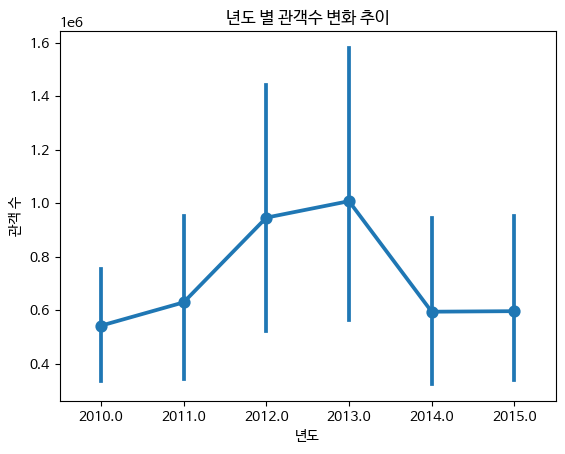

In [ ]:
# pointplot으로 표현
sns.pointplot(x=year, y=df['box_off_num'])
plt.title('년도 별 관객수 변화 추이')
plt.xlabel('년도')
plt.ylabel('관객 수')
plt.show()

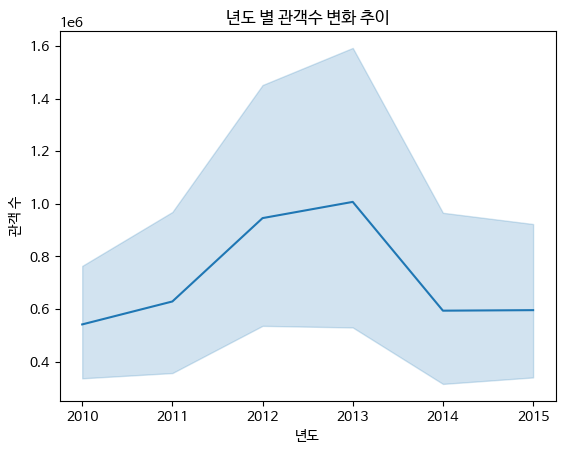

In [ ]:
# lineplot으로 표현
sns.lineplot(x=year, y=df['box_off_num'])
plt.title('년도 별 관객수 변화 추이')
plt.xlabel('년도')
plt.ylabel('관객 수')
plt.show()

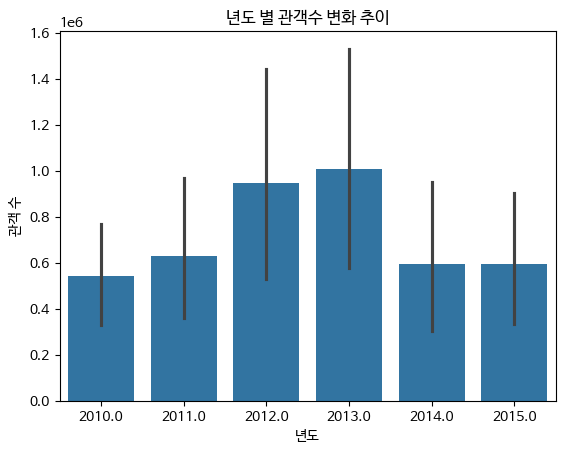

In [ ]:
# barplot
sns.barplot(x=year, y=df['box_off_num'])
plt.title('년도 별 관객수 변화 추이')
plt.xlabel('년도')
plt.ylabel('관객 수')
plt.show()

*  2010년 이후부터 꾸준히 관객수가 증가하다가 2012년 ~ 2013년에 관객수가 가장 높고 2014년 이후로 관객수가 감소하는 것을 확인할 수 있다.



**5-6. 감독이 전 제작에 참여한 영화수에 따른 관객수 변화 추이**

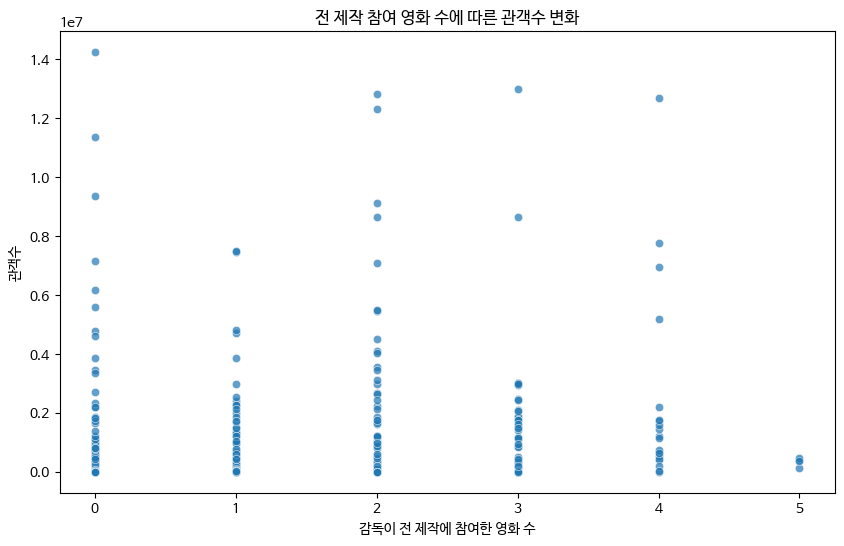

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dir_prev_num', y='box_off_num', data=df, alpha=0.7)
plt.title('전 제작 참여 영화 수에 따른 관객수 변화')
plt.xlabel('감독이 전 제작에 참여한 영화 수')
plt.ylabel('관객수')
plt.show()

- 감독이 전 제작에 참여한 영화 수가 높을 수록 관객 수가 많을 것이라고 예상했던 것과 다르게, 두 변수 간의 유의미한 선형 관계가 보이지 않는다.

**5-7. 배급사 별 관객수의 변화**

<Axes: xlabel='distributor'>

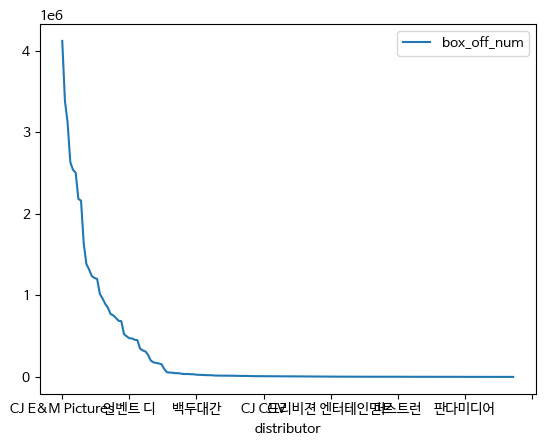

In [ ]:
train[['distributor', 'box_off_num']].groupby('distributor').mean().sort_values('box_off_num', ascending=False).plot(kind='line')

관객수가 제일 높은 top 30만 자세히 놓고 보면 다음과 같다.

<Axes: xlabel='distributor'>

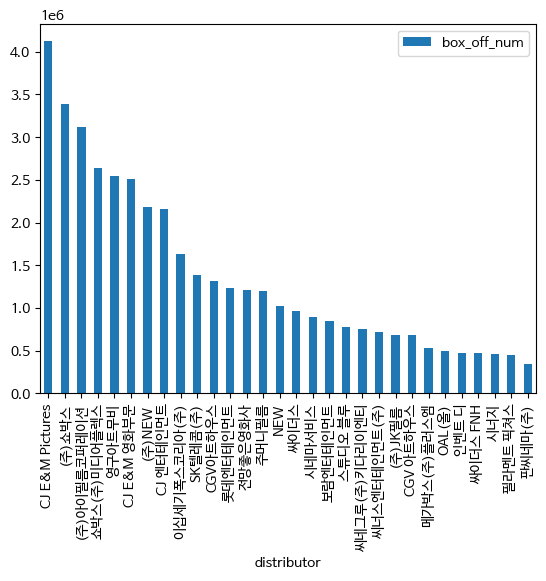

In [ ]:
train[['distributor', 'box_off_num']].groupby('distributor').mean().sort_values('box_off_num', ascending=False).head(30).plot(kind='bar')

배급사 별로 관객수가 차이난다. 즉, 관객수를 많이 끌어들이는 영화를 배급하는 배급사가 있다는 것이다.

**5-8. 감독 별 관객수의 변화**

<Axes: xlabel='director'>

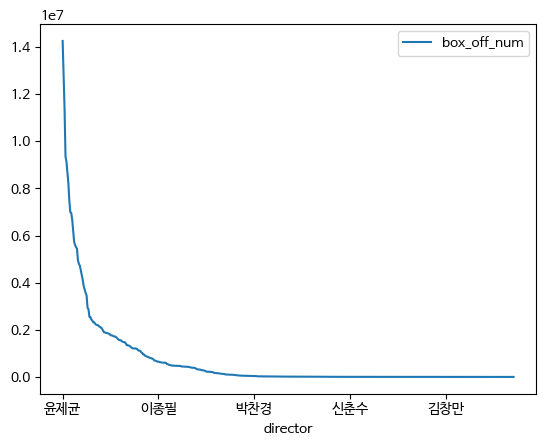

In [ ]:
train[['director', 'box_off_num']].groupby('director').mean().sort_values('box_off_num', ascending=False).plot(kind='line')

관객수가 제일 높은 top 30만 자세히 놓고 보면 다음과 같다.

<Axes: xlabel='director'>

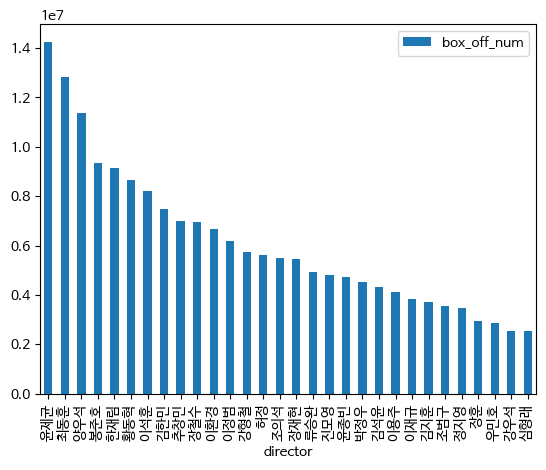

In [ ]:
train[['director', 'box_off_num']].groupby('director').mean().sort_values('box_off_num', ascending=False).head(30).plot(kind='bar')

감독 별로 관객수가 차이난다. 즉, 관객수를 많이 끌어들이는 상업 영화를 잘 만드는 감독이 있다는 것이다.

**5-9. 주연 배우 수에 따른 관객 수**

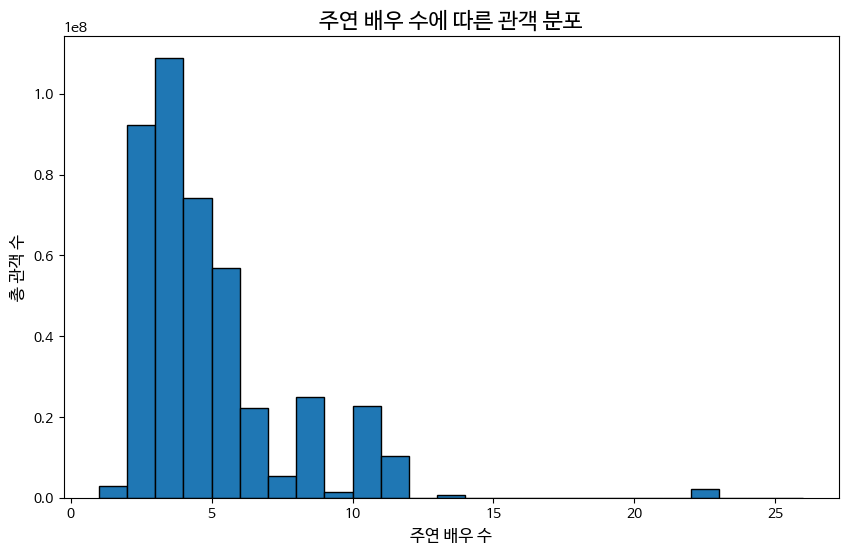

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train['num_actor'], bins=range(1, train['num_actor'].max() + 2), weights=train['box_off_num'], edgecolor='black')

plt.title('주연 배우 수에 따른 관객 분포', fontsize=16)
plt.xlabel('주연 배우 수', fontsize=12)
plt.ylabel('총 관객 수', fontsize=12)

plt.show()


- 주연배우 수가 약 5-10명일때 관객수가 많음을 확인할 수 있다.

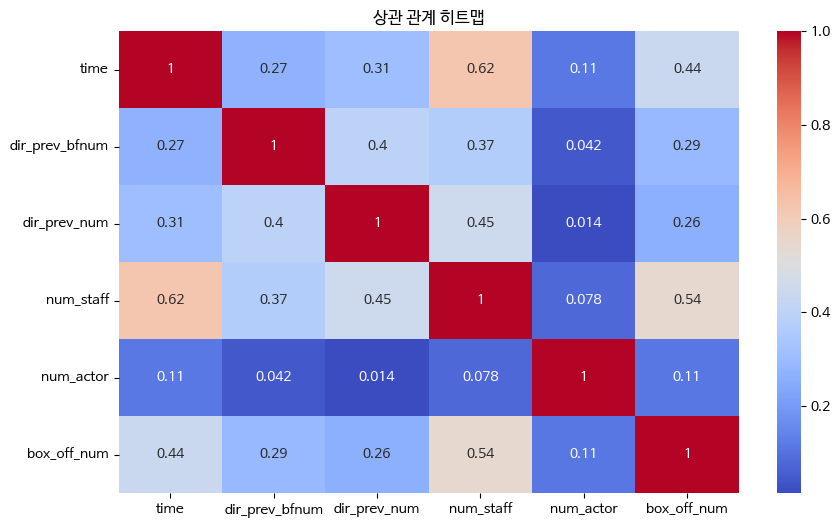

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수만 선택
numeric_columns = train.select_dtypes(include=['float64', 'int64'])

# 히트맵 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('상관 관계 히트맵')
plt.show()

- 주연 배우 수(num_actor)와 관객 수(box_off_num) 간의 상관관계를 살펴보았을 때, 상관계수는 0.11로 매우 낮은 것을 확인할 수 있다.
- 따라서, 주연 배우 수는 관객 수에 큰 영향을 미치지 않는다는 것을 알 수 있다.

**5-10. 장르별 감독 수**

     genre  count
0       SF     12
1       공포     41
2      느와르     26
3    다큐멘터리     86
4      드라마    181
5   멜로/로맨스     67
6      뮤지컬      3
7     미스터리     17
8     서스펜스      2
9    애니메이션     19
10      액션     27
11     코미디     49


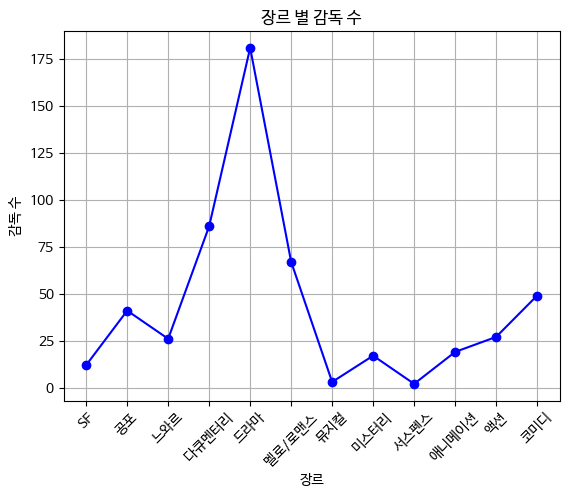

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = train

# 장르별로 그룹화하고, 각 장르 별 감독 수를 계산한다.
genre_director_count = df.groupby('genre')['director'].nunique().reset_index(name='count')

print(genre_director_count)

plt.plot(genre_director_count['genre'], genre_director_count['count'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.title('장르 별 감독 수')
plt.xlabel('장르')
plt.ylabel('감독 수')
plt.grid(True)
plt.show()

- 위의 꺾은선 그래프를 통해 드라마 > 다큐멘터리 > 멜로/로맨스 순으로 감독 수가 많음을 알 수 있다.
- 또한, 뮤지컬과 서스펜스 장르에 참여한 감독의 수가 제일 적음을 알 수 있다.

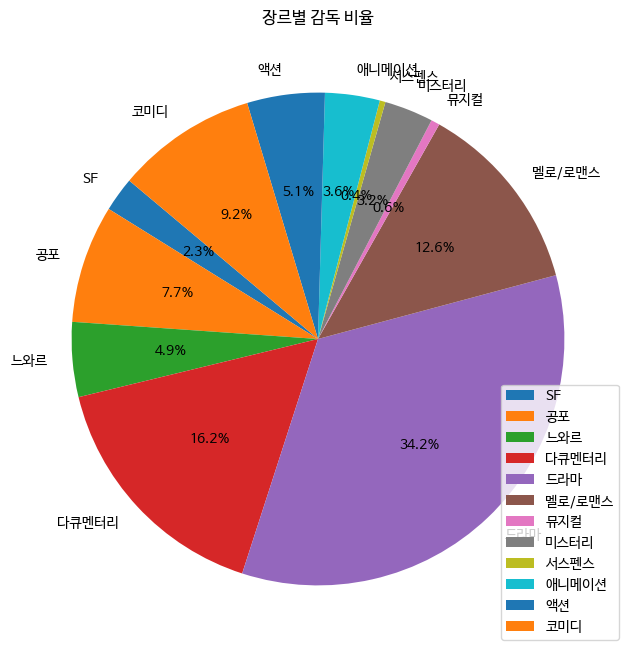

In [ ]:
# 장르별 감독 수 계산
genre_director_count = train.groupby('genre')['director'].nunique()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(genre_director_count, labels=genre_director_count.index, autopct='%1.1f%%', startangle=140)

#레이블을 45도로 회전함
plt.legend(loc='best', labels=genre_director_count.index, fontsize=10)
plt.title('장르별 감독 비율')
plt.show()

- 파이그래프를 통해 드라마에서의 감독 수가 제일 많음을 쉽게 확인할 수 있다.
- 정확한 수치를 통해 서스펜스 장르의 감독의 수가 제일 적음을 알 수 있다.